In [3]:
import numpy as np
import pandas as pd

In [4]:
def maketeachers(numteachers,numenglish):
    TeacherStruct={}
    for i in [(i) for i in list(range(0,numteachers))]:
        TeacherStruct[i]={'Schedule':['On','On','On','On','On','On','On','On'],
                           'Department':'Misc',
                           'Home Rooms':[None,None]}
    for i in TeacherStruct.keys():
        if i<numenglish:
            TeacherStruct[i]['Department']="English"
        else:
            TeacherStruct[i]['Department']="Misc"    
            
    return TeacherStruct

In [10]:

assignbreaks(assignhome(65,2,maketeachers(70,5)))

{0: {'Schedule': ['Off', 'On', 'On', 'Off', 'Off', 'On', 'On', 'On'],
  'Department': 'English',
  'Home Rooms': [21, 58]},
 1: {'Schedule': ['On', 'Off', 'Off', 'On', 'Off', 'On', 'On', 'On'],
  'Department': 'English',
  'Home Rooms': [20, 41]},
 2: {'Schedule': ['Off', 'On', 'Off', 'On', 'Off', 'On', 'On', 'On'],
  'Department': 'English',
  'Home Rooms': [21, 17]},
 3: {'Schedule': ['Off', 'On', 'Off', 'On', 'On', 'On', 'Off', 'On'],
  'Department': 'English',
  'Home Rooms': [51, 23]},
 4: {'Schedule': ['Off', 'On', 'On', 'On', 'On', 'On', 'Off', 'Off'],
  'Department': 'English',
  'Home Rooms': [53, 19]},
 5: {'Schedule': ['Off', 'On', 'On', 'On', 'Off', 'On', 'On', 'On'],
  'Department': 'Misc',
  'Home Rooms': [65, 64]},
 6: {'Schedule': ['On', 'On', 'On', 'On', 'On', 'On', 'Off', 'Off'],
  'Department': 'Misc',
  'Home Rooms': [44, 38]},
 7: {'Schedule': ['On', 'Off', 'On', 'Off', 'On', 'On', 'On', 'On'],
  'Department': 'Misc',
  'Home Rooms': [55, 12]},
 8: {'Schedule': ['O

In [5]:
def assignhome(countclassrooms,counthomerooms,TeacherStruct):
    tennentcount=dict.fromkeys(range(1,countclassrooms+1), 0)
    
    for i in TeacherStruct:
        picks=[]
        for j in range(0,counthomerooms):
            rooms=[i for i in tennentcount.keys() if tennentcount[i]<counthomerooms+1]
            pick=int(np.random.choice(rooms,1,replace=False))
            tennentcount[pick]+=1
            picks.append(pick)
        TeacherStruct[i]['Home Rooms']=picks
        
    return TeacherStruct
    


In [6]:
def assignbreaks(TeacherStruct):
    confcounter={'0':0,'1':0,"2":0,"7":0}
    lunchcounter={'3':0,'4':0,"5":0,"6":0}
    stop=21
    schedules=[]

    for i in TeacherStruct:
    
        lunch=[]
    
        for j in list(lunchcounter.keys()):
            if lunchcounter[str(j)]<stop:
                lunch.append(int(j))
    
        schedule= ["On","On",'On',"On","On",'On',"On",'On']
    
        lt=np.random.choice(lunch,1)[0]
    
        schedule[lt]='Off'
        lunchcounter[str(lt)]+=1
    
        conf=[]
        
        for x in list(confcounter.keys()):
            if confcounter[str(x)]<stop:
                conf.append(int(x))
    
        co=np.random.choice(conf,1)[0]
    
        schedule[co]='Off'
        confcounter[str(co)]+=1
        
        if TeacherStruct[i]['Department']=='English':
            slots=[0,1,2,3,4,5,6,7]
            slots.remove(lt)
            slots.remove(co)
            englishbreak=np.random.choice(slots,1)[0]
            schedule[englishbreak]='Off'
            
    
        schedules.append(schedule)
        
    for a in range(0,len(schedules)):
        TeacherStruct[a]['Schedule']=schedules[a]
        
    
    return TeacherStruct

In [7]:
def assignclassrooms(TeacherStruct):
    periods=dict.fromkeys(['0','1','2','3','4','5','6','7'],list(range(1,74)))
    for i in periods:
        for j in TeacherStruct:
            notpicked=periods[i]
            possible=TeacherStruct[j]['Home Rooms']
            possible=[q for q in possible if q in notpicked]
        
            if TeacherStruct[j]['Schedule'][int(i)]=='Off':
                picked='Off'
            elif len(possible)!=0:
                picked=int(np.random.choice(possible,1))
            elif len(notpicked)!=0:
                picked=int(np.random.choice(notpicked,1))
            else:
                picked='Hallway'
    
        
            updated=[v for v in periods[i] if v!=(picked)]
            periods[i]=updated
            TeacherStruct[j]['Schedule'][int(i)]=picked
    return TeacherStruct

In [19]:
def simulation(runs,teachernum,englishnumbers,classrooms,numhomerooms):
    SimFrame=pd.DataFrame()
    TeacherStruct=maketeachers(teachernum,englishnumbers)
    TeacherStruct=assignhome(classrooms,numhomerooms,TeacherStruct)
    
    for q in range(0,runs):

        TeacherStruct=assignbreaks(TeacherStruct)
        
        TeacherStruct=assignclassrooms(TeacherStruct)
                
        Assigned=[TeacherStruct[i]['Schedule'] for i in TeacherStruct]
    
        SimFrame=SimFrame.append(pd.DataFrame(Assigned).assign(Simulation=q))
        
    SimFrame['TeacherId']=SimFrame.index.values

    return [SimFrame,TeacherStruct]
    

In [20]:
def bean(thelist):
    return [i  for i in thelist if i!='Off']
def numroom(thelist):
    return len(pd.Series(thelist).drop_duplicates())-1

In [21]:
outlist = simulation(runs=1000,
                     teachernum=80,
                     englishnumbers=5,
                     classrooms=73,
                     numhomerooms=1)
SimFrame=outlist[0]
TeacherStruct=outlist[1]

scheduleseries=pd.Series((' '+SimFrame.astype(str)).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)).str.split(' ').str[1:]
HomeFrame=pd.Series([TeacherStruct[i]['Home Rooms'] for i in TeacherStruct]).reset_index().rename(columns={'index':'TeacherId',
                                                                                                0:'Home Rooms'})
S2=SimFrame.\
    reset_index(drop=True).\
    assign(Colapsed=scheduleseries).\
    set_index('TeacherId').\
    join(HomeFrame.\
             set_index('TeacherId')).\
    reset_index()

F1=S2['Colapsed'].apply(numroom).value_counts(normalize=True).reset_index().sort_values('index').rename(columns={'index':'Rooms Used'}).reset_index(drop=True)

In [22]:
outlist = simulation(runs=1000,
                     teachernum=80,
                     englishnumbers=5,
                     classrooms=73,
                     numhomerooms=2)
SimFrame=outlist[0]
TeacherStruct=outlist[1]


scheduleseries=pd.Series((' '+SimFrame.astype(str)).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)).str.split(' ').str[1:]
HomeFrame=pd.Series([TeacherStruct[i]['Home Rooms'] for i in TeacherStruct]).reset_index().rename(columns={'index':'TeacherId',
                                                                                                0:'Home Rooms'})
S2=SimFrame.\
    reset_index(drop=True).\
    assign(Colapsed=scheduleseries).\
    set_index('TeacherId').\
    join(HomeFrame.\
             set_index('TeacherId')).\
    reset_index()

F2=S2['Colapsed'].apply(numroom).\
    value_counts(normalize=True).\
    reset_index().sort_values('index').\
    rename(columns={'index':'Rooms Used'}).\
    reset_index(drop=True)

In [23]:
outlist = simulation(runs=1000,
                     teachernum=80,
                     englishnumbers=5,
                     classrooms=73,
                     numhomerooms=3)
SimFrame=outlist[0]
TeacherStruct=outlist[1]


scheduleseries=pd.Series((' '+SimFrame.astype(str)).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)).str.split(' ').str[1:]
HomeFrame=pd.Series([TeacherStruct[i]['Home Rooms'] for i in TeacherStruct]).reset_index().rename(columns={'index':'TeacherId',
                                                                                                0:'Home Rooms'})
S2=SimFrame.\
    reset_index(drop=True).\
    assign(Colapsed=scheduleseries).\
    set_index('TeacherId').\
    join(HomeFrame.\
             set_index('TeacherId')).\
    reset_index()

F3=S2['Colapsed'].apply(numroom).\
    value_counts(normalize=True).\
    reset_index().sort_values('index').\
    rename(columns={'index':'Rooms Used'}).\
    reset_index(drop=True)

In [24]:
outlist = simulation(runs=1000,
                     teachernum=80,
                     englishnumbers=5,
                     classrooms=73,
                     numhomerooms=4)
SimFrame=outlist[0]
TeacherStruct=outlist[1]


scheduleseries=pd.Series((' '+SimFrame.astype(str)).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)).str.split(' ').str[1:]
HomeFrame=pd.Series([TeacherStruct[i]['Home Rooms'] for i in TeacherStruct]).reset_index().rename(columns={'index':'TeacherId',
                                                                                                0:'Home Rooms'})
S2=SimFrame.\
    reset_index(drop=True).\
    assign(Colapsed=scheduleseries).\
    set_index('TeacherId').\
    join(HomeFrame.\
             set_index('TeacherId')).\
    reset_index()

F4=S2['Colapsed'].apply(numroom).\
    value_counts(normalize=True).\
    reset_index().sort_values('index').\
    rename(columns={'index':'Rooms Used'}).\
    reset_index(drop=True)

In [35]:
from plotnine import*

In [26]:
F1

,Rooms Used,Colapsed
0,1,0.400662
1,2,0.108800
2,3,0.059725
3,4,0.065363
4,5,0.184787
5,6,0.180663


In [27]:
F2

,Rooms Used,Colapsed
0,1,0.070813
1,2,0.543450
2,3,0.137662
3,4,0.124875
4,5,0.089400
5,6,0.033800


In [28]:
F3

,Rooms Used,Colapsed
0,1,0.021750
1,2,0.281587
2,3,0.491025
3,4,0.133213
4,5,0.054475
5,6,0.017950


In [29]:
F4

,Rooms Used,Colapsed
0,1,0.006225
1,2,0.134250
2,3,0.468488
3,4,0.317812
4,5,0.058888
5,6,0.014337


In [48]:
AllSim=F1.assign(HomeRooms='1 Home Room').append(F2.assign(HomeRooms='2 Home Rooms')).append(F3.assign(HomeRooms='3 Home Rooms')).append(F4.assign(HomeRooms='4 Home Rooms'))

In [57]:
from mizani.formatters import percent_format

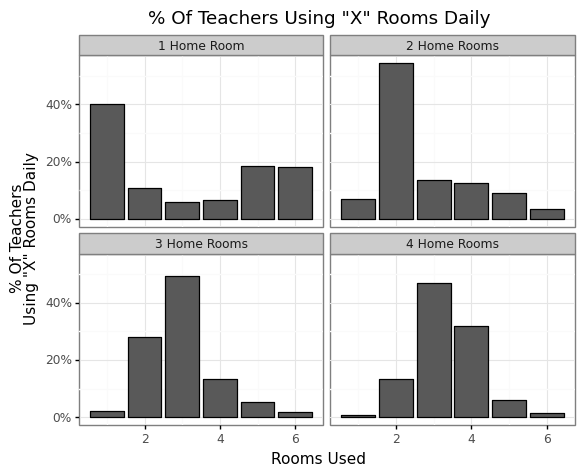

<ggplot: (-9223371883197739740)>

In [64]:
(ggplot(AllSim,aes(x='Rooms Used',y='Colapsed'))+
 geom_col(color='black')+
 theme_bw()+
 facet_wrap('~HomeRooms')+
 ylab('% Of Teachers\nUsing "X" Rooms Daily')+ 
 scale_y_continuous(labels=percent_format())+
 ggtitle('% Of Teachers Using "X" Rooms Daily'))

In [88]:
a=F1[F1['Rooms Used']<=4]['Colapsed'].sum().round(4)*100

In [89]:
b=F2[F2['Rooms Used']<=4]['Colapsed'].sum().round(4)*100

In [90]:
c=F3[F3['Rooms Used']<=4]['Colapsed'].sum().round(4)*100

In [91]:
d=F4[F4['Rooms Used']<=4]['Colapsed'].sum().round(4)*100

In [94]:
Tab=pd.DataFrame({'Home Rooms Assigned':[1,2,3,4],
              '% Teachers Using 4 or Fewer Rooms':[a,b,c,d]})

In [100]:
Tab.index=['','','','']

In [109]:
Tab['% Teachers Using 4 or Fewer Rooms']=Tab['% Teachers Using 4 or Fewer Rooms'].round(2).astype(str)+'%'

In [110]:
Tab

,Home Rooms Assigned,% Teachers Using 4 or Fewer Rooms
,1,63.45%
,2,87.68%
,3,92.76%
,4,92.68%
